In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import json
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Files to Load
player_data_to_load = os.path.join("player_data_cleaned.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")
# Budgets
budgets_2009_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2008-2009.csv")
budgets_2010_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2009-2010.csv")
budgets_2011_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2010-2011.csv")
budgets_2012_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2011-2012.csv")
budgets_2013_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2012-2013.csv")
budgets_2014_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2013-2014.csv")
budgets_2015_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2014-2015.csv")
budgets_2016_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2015-2016.csv")
budgets_2017_data_to_load = os.path.join("budgets/","ope_ed_gov_schools_2016-2017.csv")

# Read the Player and Season Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")

# Read the Budget Data From 2008-2017
budget2009_data_df = pd.read_csv(budgets_2009_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2010_data_df = pd.read_csv(budgets_2010_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2011_data_df = pd.read_csv(budgets_2011_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2012_data_df = pd.read_csv(budgets_2012_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2013_data_df = pd.read_csv(budgets_2013_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2014_data_df = pd.read_csv(budgets_2014_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127]) 
budget2015_data_df = pd.read_csv(budgets_2015_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])
budget2016_data_df = pd.read_csv(budgets_2016_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])
budget2017_data_df = pd.read_csv(budgets_2017_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 12, 16, 22, 23, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 64, 65, 66, 67, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 100, 101, 102, 103, 108, 109, 112, 114, 115, 117, 118, 120, 121, 123, 124, 126, 127])


# Display the data table for preview
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947",University of California-Los Angeles
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University and Agricultural & ...
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [3]:
#University of California, Los Angeles	University of California-Los Angeles#
#University of North Carolina	University of North Carolina at Chapel Hill
#Indiana University	Indiana University-Bloomington
#St. John's University	St. John's University-New York
#University of Michigan	University of Michigan-Ann Arbor
#Ohio State University	Ohio State University-Main Campus
#North Carolina State University	North Carolina State University at Raleigh
#University of Minnesota	University of Minnesota-Twin Cities
#University of Maryland	University of Maryland-College Park
#Louisiana State University	Louisiana State University and Agricultural & Mechanical College
#Georgia Institute of Technology	Georgia Institute of Technology-Main Campus
#University of Nevada, Las Vegas	University of Nevada-Las Vegas

In [4]:
# Inspect budget data from U.S. Department of Education 2017 https://ope.ed.gov/athletics/#/datafile/list
budget2017_data_df.head()

,institution_name,city_txt,classification_name,EFTotalCount,PARTIC_MEN,OPEXPPERPART_MEN,OPEXPPERTEAM_MEN,TOTAL_OPEXP_INCLCOED,MEN_FTHEADCOACH_MALE,MEN_PTHEADCOACH_MALE,...,TOTAL_REV_COED,REVENUE_MENALL,TOTAL_REVENUE_ALL,EXP_MEN,TOTAL_EXP_MENWOMEN,EXP_COED_MEN,TOTAL_EXP_COED,EXPENSE_MENALL,TOTAL_EXPENSE_ALL,Sports
0,Alabama A & M University,Normal,NCAA Division I-FCS,4211,35.0,4443.0,155495.0,155495,1.0,NaN,...,NaN,516227,516227,516227.0,516227.0,NaN,NaN,516227,516227,Baseball
1,Alabama A & M University,Normal,NCAA Division I-FCS,4211,15.0,15111.0,226663.0,453096,1.0,NaN,...,NaN,824939,1694668,824939.0,1694668.0,NaN,NaN,824939,1694668,Basketball
2,Alabama A & M University,Normal,NCAA Division I-FCS,4211,53.0,986.0,52260.0,119613,NaN,NaN,...,NaN,232691,598724,232691.0,598724.0,NaN,NaN,232691,598724,All Track Combined
3,Alabama A & M University,Normal,NCAA Division I-FCS,4211,108.0,5437.0,587221.0,587221,1.0,NaN,...,NaN,2996306,2996306,2996306.0,2996306.0,NaN,NaN,2996306,2996306,Football
4,Alabama A & M University,Normal,NCAA Division I-FCS,4211,7.0,2980.0,20858.0,20858,NaN,1.0,...,NaN,117942,117942,117942.0,117942.0,NaN,NaN,117942,117942,Golf


In [5]:
#Read in specific columms, rename by year
budget2009_data_basketball_df = budget2009_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2009_data_df['Sports'] == 'Basketball').dropna()
budget2010_data_basketball_df = budget2010_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2010_data_df['Sports'] == 'Basketball').dropna()
budget2011_data_basketball_df = budget2011_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2011_data_df['Sports'] == 'Basketball').dropna()
budget2012_data_basketball_df = budget2012_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2012_data_df['Sports'] == 'Basketball').dropna()
budget2013_data_basketball_df = budget2013_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2013_data_df['Sports'] == 'Basketball').dropna()
budget2014_data_basketball_df = budget2014_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2014_data_df['Sports'] == 'Basketball').dropna()
budget2015_data_basketball_df = budget2015_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2015_data_df['Sports'] == 'Basketball').dropna()
budget2016_data_basketball_df = budget2016_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2016_data_df['Sports'] == 'Basketball').dropna()
budget2017_data_basketball_df = budget2017_data_df[['institution_name', 'REVENUE_MENALL', 'EXPENSE_MENALL']].where(budget2017_data_df['Sports'] == 'Basketball').dropna()
budget2009_data_basketball_df.head()

,institution_name,REVENUE_MENALL,EXPENSE_MENALL
1,Alabama A & M University,643171.0,643171.0
11,University of Alabama at Birmingham,2499318.0,2612021.0
22,University of Alabama in Huntsville,381250.0,394777.0
30,Alabama State University,686339.0,686339.0
40,The University of Alabama,8766826.0,4989815.0


In [6]:
budget2009_data_basketball_df = budget2009_data_basketball_df.reset_index(drop=True)
budget2010_data_basketball_df = budget2010_data_basketball_df.reset_index(drop=True)
budget2009_data_basketball_df.head()

,institution_name,REVENUE_MENALL,EXPENSE_MENALL
0,Alabama A & M University,643171.0,643171.0
1,University of Alabama at Birmingham,2499318.0,2612021.0
2,University of Alabama in Huntsville,381250.0,394777.0
3,Alabama State University,686339.0,686339.0
4,The University of Alabama,8766826.0,4989815.0


In [7]:
#Merge budget data in steps
budget_data_merged_1 = pd.merge(budget2009_data_basketball_df, budget2010_data_basketball_df, on="institution_name", suffixes=['_2009','_2010'], how="left")
budget_data_merged_2 = pd.merge(budget2011_data_basketball_df, budget2012_data_basketball_df, on="institution_name", suffixes=['_2011','_2012'], how="left")
budget_data_merged_3 = pd.merge(budget2013_data_basketball_df, budget2014_data_basketball_df, on="institution_name", suffixes=['_2013','_2014'], how="left")
budget_data_merged_4 = pd.merge(budget2015_data_basketball_df, budget2016_data_basketball_df, on="institution_name", suffixes=['_2015','_2016'], how="left")
budget_data_merged_5 = pd.merge(budget_data_merged_1, budget_data_merged_2, on="institution_name", how="left")
budget_data_merged_6 = pd.merge(budget_data_merged_3, budget_data_merged_4, on="institution_name", how="left")
budget_data_merged_7 = pd.merge(budget_data_merged_5, budget_data_merged_6, on="institution_name", how="left")
budget_data_merged_8 = pd.merge(budget_data_merged_7, budget2017_data_basketball_df, on="institution_name", how="left")
complete_budget_data_merged = budget_data_merged_8.rename(columns={'REVENUE_MENALL_2009':'Revenue_2009',  'EXPENSE_MENALL_2009':'Expense_2009',  'REVENUE_MENALL_2010':'Revenue_2010',  'EXPENSE_MENALL_2010':'Expense_2010',  'REVENUE_MENALL_2011':'Revenue_2011',  'EXPENSE_MENALL_2011':'Expense_2011',  'REVENUE_MENALL_2012':'Revenue_2012',  'EXPENSE_MENALL_2012':'Expense_2012',  'REVENUE_MENALL_2013':'Revenue_2013',  'EXPENSE_MENALL_2013':'Expense_2013',  'REVENUE_MENALL_2014':'Revenue_2014',  'EXPENSE_MENALL_2014':'Expense_2014',  'REVENUE_MENALL_2015':'Revenue_2015',  'EXPENSE_MENALL_2015':'Expense_2015',  'REVENUE_MENALL_2016':'Revenue_2016',  'EXPENSE_MENALL_2016':'Expense_2016',  'REVENUE_MENALL':'Revenue_2017', 'EXPENSE_MENALL':'Expense_2017'})
complete_budget_data_merged.head()

,institution_name,Revenue_2009,Expense_2009,Revenue_2010,Expense_2010,Revenue_2011,Expense_2011,Revenue_2012,Expense_2012,Revenue_2013,Expense_2013,Revenue_2014,Expense_2014,Revenue_2015,Expense_2015,Revenue_2016,Expense_2016,Revenue_2017,Expense_2017
0,Alabama A & M University,643171.0,643171.0,667769.0,667769.0,732937.0,618738.0,835750.0,604570.0,1100954.0,778139.0,1058243.0,669821.0,875442.0,800610.0,1211095.0,817868.0,824939.0,824939.0
1,University of Alabama at Birmingham,2499318.0,2612021.0,3121570.0,2805087.0,2732944.0,2732944.0,3418881.0,3360401.0,3305472.0,2946415.0,3592461.0,2959620.0,3952661.0,3952661.0,4189826.0,4189826.0,3369190.0,3357016.0
2,University of Alabama in Huntsville,381250.0,394777.0,364897.0,412282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678342.0,678342.0
3,Alabama State University,686339.0,686339.0,782329.0,782329.0,839454.0,839454.0,823840.0,823840.0,925071.0,925071.0,980598.0,980598.0,933140.0,933140.0,977453.0,859867.0,815998.0,815998.0
4,The University of Alabama,8766826.0,4989815.0,10766327.0,6410262.0,11016184.0,6819080.0,11770736.0,6161728.0,12185695.0,6354140.0,14800313.0,6573147.0,12780576.0,7164296.0,14446339.0,8577428.0,15003656.0,9681264.0


In [9]:
#Gather variables
#Number of unique colleges
unique_college = player_data_df['college'].nunique()

#Group colleges to count players
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})

#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()

#College Mode
modeCollege_df = countByCollege['count'].sort_values(ascending=False)
modeCollege_df = modeCollege_df.reset_index(drop=True)
modeCollege = modeCollege_df.mode()
modeCollege = modeCollege.iloc[0]
modeCollege

#Earliest start year
minStartyear = player_data_df['year_start'].min()

#Latest start year
latestStartyear = player_data_df['year_start'].max()

#Number of unique players
unique_player = player_data_df['name'].nunique()

#Copy player dataframe
playerYears_df = player_data_df[['year_start','birth_date']].copy()

#Birth year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year

playerYears_df.head()
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']

averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)

#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})

firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)

currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)

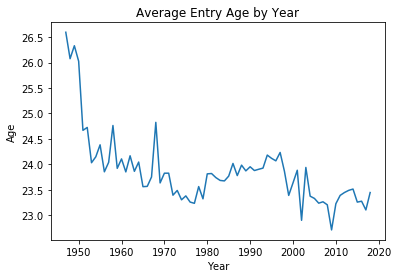

In [12]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")

plt.plot(year_strt, AverAge)
fig1 = plt.gcf()
plt.show()

In [13]:
#plt.show()
#plt.draw()
fig1.savefig('average_age.png', dpi=100)
#plt.savefig('average_age.png', dpi=100)

In [14]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
countByCollege.head()

,college,count
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


In [15]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
top25colleges.head()

,college,count
0,University of Kentucky,99
1,University of California-Los Angeles,91
2,University of North Carolina at Chapel Hill,87
3,University of Kansas,72
4,Duke University,71


<BarContainer object of 25 artists>

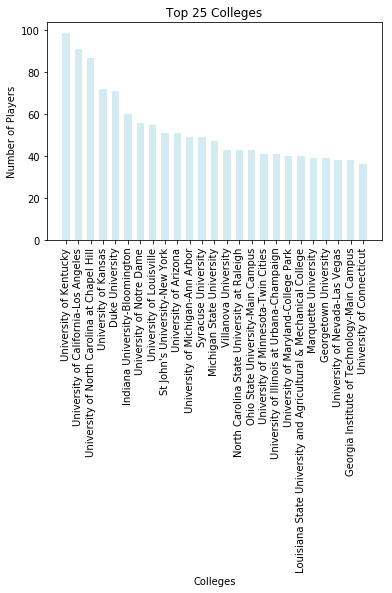

In [25]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

fig2 = plt.gcf()
plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [26]:
fig2.savefig('top25colleges.png', dpi=100)

In [18]:
#Budget data for top 25 colleges
top_25_college_budget_merged = pd.merge(top25colleges, complete_budget_data_merged, how="left", left_on="college", right_on="institution_name")
top_25_college_budget_merged.fillna(0, inplace=True)
top_25_college_budget_merged.head()

,college,count,institution_name,Revenue_2009,Expense_2009,Revenue_2010,Expense_2010,Revenue_2011,Expense_2011,Revenue_2012,...,Revenue_2013,Expense_2013,Revenue_2014,Expense_2014,Revenue_2015,Expense_2015,Revenue_2016,Expense_2016,Revenue_2017,Expense_2017
0,University of Kentucky,99,University of Kentucky,14773034.0,8615726.0,16781239.0,11573283.0,18557243.0,12355375.0,21598680.0,...,23201795.0,13672723.0,23655649.0,16198525.0,24684543.0,20009991.0,27239237.0,18910412.0,27965227.0,19180059.0
1,University of California-Los Angeles,91,University of California-Los Angeles,11775932.0,6996960.0,12353487.0,6277088.0,11621364.0,6702818.0,8375109.0,...,12369639.0,12717020.0,12168231.0,8376981.0,12228209.0,8256449.0,11318447.0,9032540.0,13416856.0,9856861.0
2,University of North Carolina at Chapel Hill,87,University of North Carolina at Chapel Hill,19852544.0,7488429.0,20551168.0,6647459.0,19672012.0,6510942.0,24011268.0,...,19632779.0,7811021.0,20905642.0,7276883.0,20771541.0,7470178.0,21342328.0,8667111.0,21408475.0,10293415.0
3,University of Kansas,72,University of Kansas,15737145.0,8219362.0,16116502.0,10984833.0,11535922.0,9513243.0,16443172.0,...,16412415.0,10724156.0,18253973.0,8479332.0,19141222.0,11273001.0,18020944.0,11636720.0,18266319.0,11126047.0
4,Duke University,71,Duke University,11842009.0,13873859.0,26667056.0,12286475.0,28917329.0,13819529.0,25665732.0,...,25735093.0,15170813.0,27000243.0,14187972.0,33772145.0,19860851.0,31033555.0,17890632.0,34398285.0,19507686.0


In [19]:
top_25_college_budget_merged['Total Budget'] = top_25_college_budget_merged['Expense_2009'] + top_25_college_budget_merged['Expense_2010'] + top_25_college_budget_merged['Expense_2011'] + top_25_college_budget_merged['Expense_2012'] + top_25_college_budget_merged['Expense_2013'] + top_25_college_budget_merged['Expense_2014'] + top_25_college_budget_merged['Expense_2015'] + top_25_college_budget_merged['Expense_2016'] + top_25_college_budget_merged['Expense_2017']
top_25_college_budget_merged['Total Revenue'] = top_25_college_budget_merged['Revenue_2009'] + top_25_college_budget_merged['Revenue_2010'] + top_25_college_budget_merged['Revenue_2011'] + top_25_college_budget_merged['Revenue_2012'] + top_25_college_budget_merged['Revenue_2013'] + top_25_college_budget_merged['Revenue_2014'] + top_25_college_budget_merged['Revenue_2015'] + top_25_college_budget_merged['Revenue_2016'] + top_25_college_budget_merged['Revenue_2017']
top_25_college_budget_merged.head()

,college,count,institution_name,Revenue_2009,Expense_2009,Revenue_2010,Expense_2010,Revenue_2011,Expense_2011,Revenue_2012,...,Revenue_2014,Expense_2014,Revenue_2015,Expense_2015,Revenue_2016,Expense_2016,Revenue_2017,Expense_2017,Total Budget,Total Revenue
0,University of Kentucky,99,University of Kentucky,14773034.0,8615726.0,16781239.0,11573283.0,18557243.0,12355375.0,21598680.0,...,23655649.0,16198525.0,24684543.0,20009991.0,27239237.0,18910412.0,27965227.0,19180059.0,135635182.0,198456647.0
1,University of California-Los Angeles,91,University of California-Los Angeles,11775932.0,6996960.0,12353487.0,6277088.0,11621364.0,6702818.0,8375109.0,...,12168231.0,8376981.0,12228209.0,8256449.0,11318447.0,9032540.0,13416856.0,9856861.0,75433455.0,105627274.0
2,University of North Carolina at Chapel Hill,87,University of North Carolina at Chapel Hill,19852544.0,7488429.0,20551168.0,6647459.0,19672012.0,6510942.0,24011268.0,...,20905642.0,7276883.0,20771541.0,7470178.0,21342328.0,8667111.0,21408475.0,10293415.0,69323056.0,188147757.0
3,University of Kansas,72,University of Kansas,15737145.0,8219362.0,16116502.0,10984833.0,11535922.0,9513243.0,16443172.0,...,18253973.0,8479332.0,19141222.0,11273001.0,18020944.0,11636720.0,18266319.0,11126047.0,94697414.0,149927614.0
4,Duke University,71,Duke University,11842009.0,13873859.0,26667056.0,12286475.0,28917329.0,13819529.0,25665732.0,...,27000243.0,14187972.0,33772145.0,19860851.0,31033555.0,17890632.0,34398285.0,19507686.0,142498916.0,245031447.0


In [20]:
top_25_college_budget_merged.dtypes

college              object
count                 int64
institution_name     object
Revenue_2009        float64
Expense_2009        float64
Revenue_2010        float64
Expense_2010        float64
Revenue_2011        float64
Expense_2011        float64
Revenue_2012        float64
Expense_2012        float64
Revenue_2013        float64
Expense_2013        float64
Revenue_2014        float64
Expense_2014        float64
Revenue_2015        float64
Expense_2015        float64
Revenue_2016        float64
Expense_2016        float64
Revenue_2017        float64
Expense_2017        float64
Total Budget        float64
Total Revenue       float64
dtype: object

<BarContainer object of 25 artists>

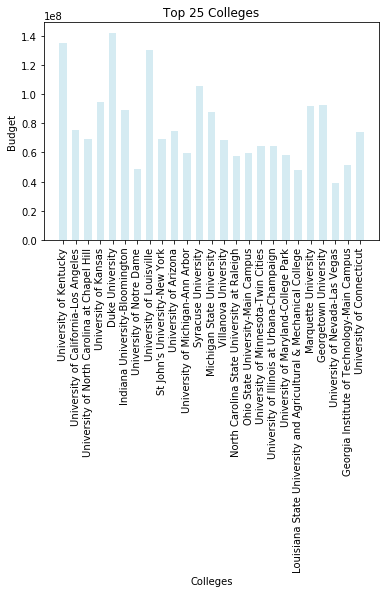

In [27]:
budget25colleges = top_25_college_budget_merged['college']
budget = top_25_college_budget_merged['Total Budget']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Budget")
plt.xticks(rotation=90)
#top25colleges['college']
fig3 = plt.gcf()
plt.xticks(width, budget25colleges)
plt.bar(width, budget, color='lightblue', alpha=0.5, align="center", width=3)

In [28]:
fig3.savefig('top25colleges_budgets.png', dpi=100)

In [29]:
df = top_25_college_budget_merged.loc[:, 'Total Budget':'Total Revenue'].copy()
df.head()

,Total Budget,Total Revenue
0,135635182.0,198456647.0
1,75433455.0,105627274.0
2,69323056.0,188147757.0
3,94697414.0,149927614.0
4,142498916.0,245031447.0


(-0.25, 24.25)

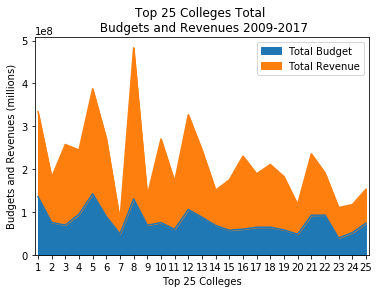

In [45]:
# plot
plot = df.plot.area()
fig = plot.get_figure()
plt.title("Top 25 Colleges Total \n Budgets and Revenues 2009-2017")
plt.xlabel("Top 25 Colleges")
plt.ylabel("Budgets and Revenues (millions)")
plt.xticks(range(len(df.index + 1)),df.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

In [46]:
fig.savefig("output.png")

In [ ]:
combined_budget_2009_2017 = top_25_college_budget_merged['Total Budget'].sum()
combined_revenue_2009_2017 = top_25_college_budget_merged['Total Revenue'].sum()
print(f"The total basketball budget for the top 25 colleges from 2009-2017 is {combined_budget_2009_2017}. For the same time, the combined revenues is {combined_revenue_2009_2017}.")

In [ ]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
top25colleges

In [ ]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges

In [ ]:
top25colleges.to_csv("output-latlong-25.csv")

In [ ]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [ ]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

In [ ]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: the mode of the player count by college is {modeCollege}, which makes sense because {singleCollege_sum} of the colleges only sent one player to the NBA! ")